### Problem 1: Linear Regression

#### You are a part of an investment firm and your work is to do research about these 759 firms. You are provided with the dataset containing the sales and other attributes of these 759 firms. Predict the sales of these firms on the bases of the details given in the dataset so as to help your company in investing consciously. Also, provide them with 5 attributes that are most important.

#### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis. 


In [139]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [2]:
firm = pd.read_csv('Firm_level_data.csv')

In [14]:
firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [4]:
firm

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46
...,...,...,...,...,...,...,...,...,...,...
754,754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39


In [9]:
firm = firm.drop(firm.columns[0],axis=1)

In [10]:
firm

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.995050,161.603986,10,382.078247,2.306000,no,11.049511,1625.453755,80.27
1,407.753973,122.101012,2,0.000000,1.860000,no,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138,3296.700439,49.659005,yes,5.205257,25865.233800,47.70
3,451.000010,266.899987,1,83.540161,3.071000,no,0.305221,63.024630,26.88
4,174.927981,140.124004,2,14.233637,1.947000,no,1.063300,67.406408,49.46
...,...,...,...,...,...,...,...,...,...
754,1253.900196,708.299935,32,412.936157,22.100002,yes,0.697454,267.119487,33.50
755,171.821025,73.666008,1,0.037735,1.684000,no,NaN,228.475701,46.41
756,202.726967,123.926991,13,74.861099,1.460000,no,5.229723,580.430741,42.25
757,785.687944,138.780992,6,0.621750,2.900000,yes,1.625398,309.938651,61.39


In [17]:
dups = firm.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(firm.shape)

Number of duplicate rows = 0
(759, 9)


In [12]:
firm.describe()

,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.000000,759.000000,759.000000,759.000000,759.000000,738.000000,759.000000,759.000000
mean,2689.705158,1977.747498,25.831357,439.938074,14.164519,2.794910,2732.734750,43.020540
std,8722.060124,6466.704896,97.259577,2007.397588,43.321443,3.366591,7071.072362,21.685586
min,0.138000,0.057000,0.000000,0.000000,0.006000,0.119001,1.971053,0.000000
25%,122.920000,52.650501,1.000000,4.628262,0.927500,1.018783,103.593946,25.395000
50%,448.577082,202.179023,3.000000,36.864136,2.924000,1.680303,410.793529,44.110000
75%,1822.547366,1075.790020,11.500000,143.253403,10.050001,3.139309,2054.160385,60.510000
max,135696.788200,93625.200560,1220.000000,30425.255860,710.799925,20.000000,95191.591160,90.150000


In [19]:
firm.isnull().sum()

sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64

In [20]:
firm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sales         759 non-null    float64
 1   capital       759 non-null    float64
 2   patents       759 non-null    int64  
 3   randd         759 non-null    float64
 4   employment    759 non-null    float64
 5   sp500         759 non-null    object 
 6   tobinq        738 non-null    float64
 7   value         759 non-null    float64
 8   institutions  759 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 53.5+ KB


In [105]:
numeric_data = firm.select_dtypes(include=[np.number])
categorical_data = firm.select_dtypes(exclude=[np.number])

In [31]:
numericcolumns = list(numeric_data.columns.values)
len(numericcolumns)

8

##### Univariate Analysis

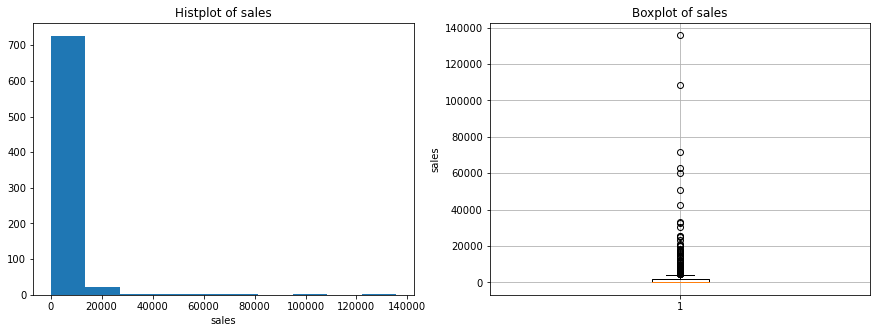

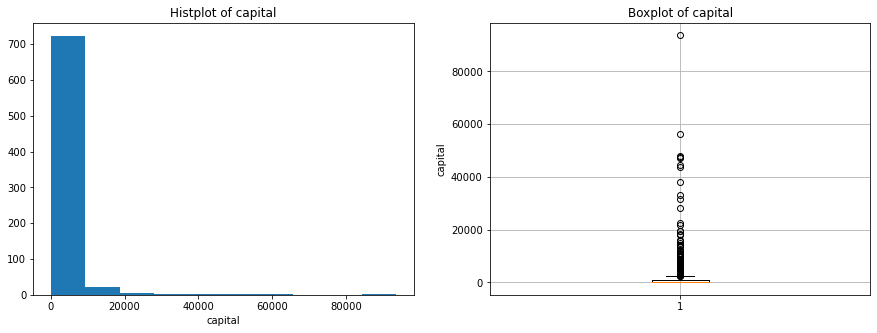

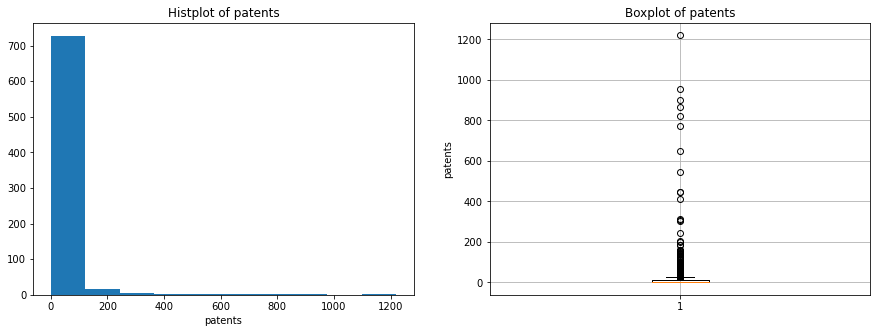

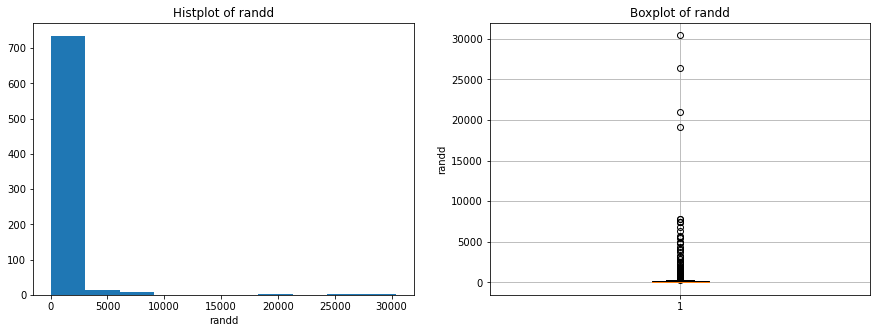

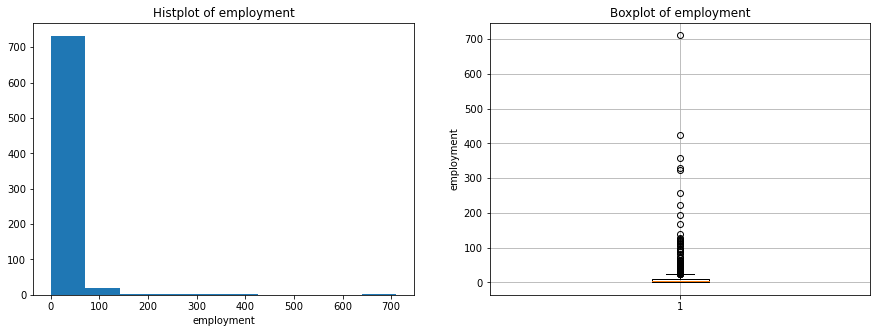

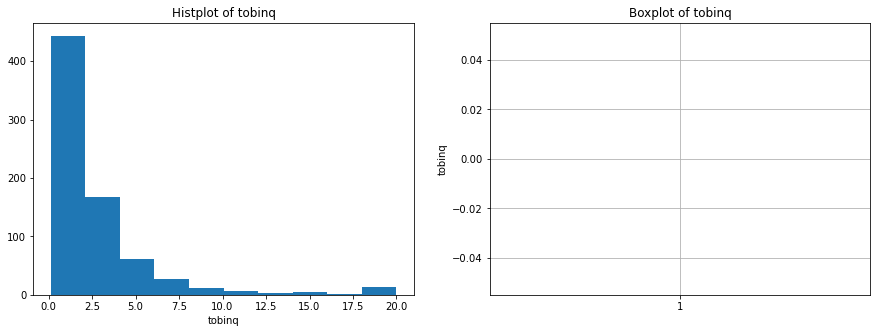

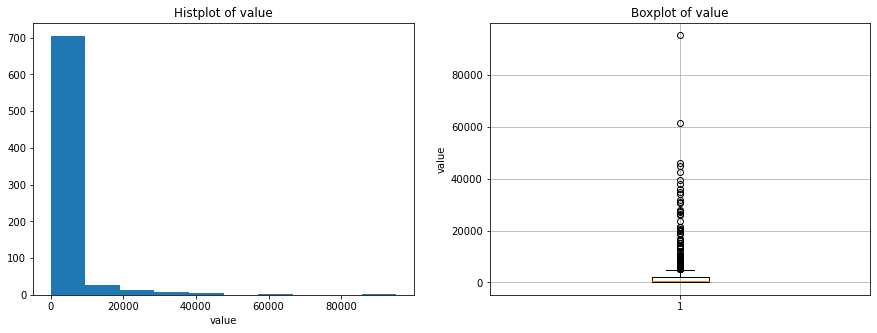

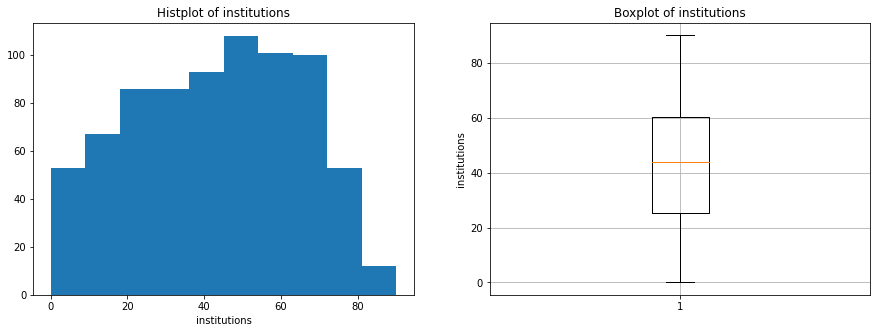

In [83]:

for i in numericcolumns:
    
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.hist(firm[i])
    plt.title('Histplot of '+i)
    plt.xlabel(i)
    plt.subplot(1, 2, 2) # index 2
    plt.boxplot(firm[i])
    plt.title('Boxplot of '+i)
    plt.ylabel(i)

    plt.grid()
    plt.show()

#### Bi Variate Analysis

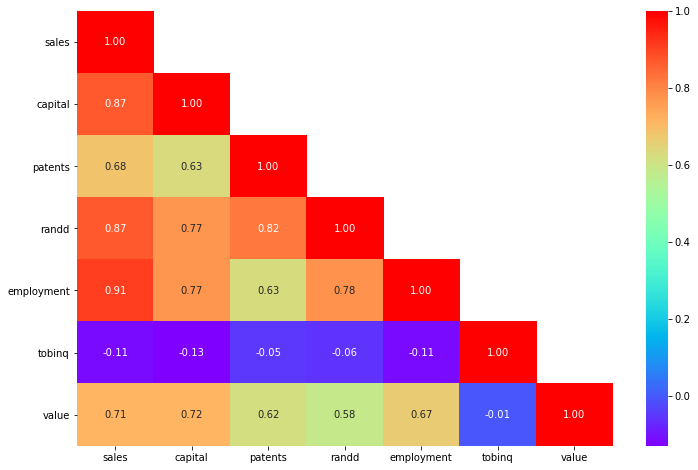

In [81]:
plt.figure(figsize=(12,8))
sns.heatmap(firm.iloc[:,0:8].corr(),annot=True,fmt='.2f',cmap='rainbow',mask=np.triu(firm.iloc[:,0:8].corr(),+1))
plt.show()

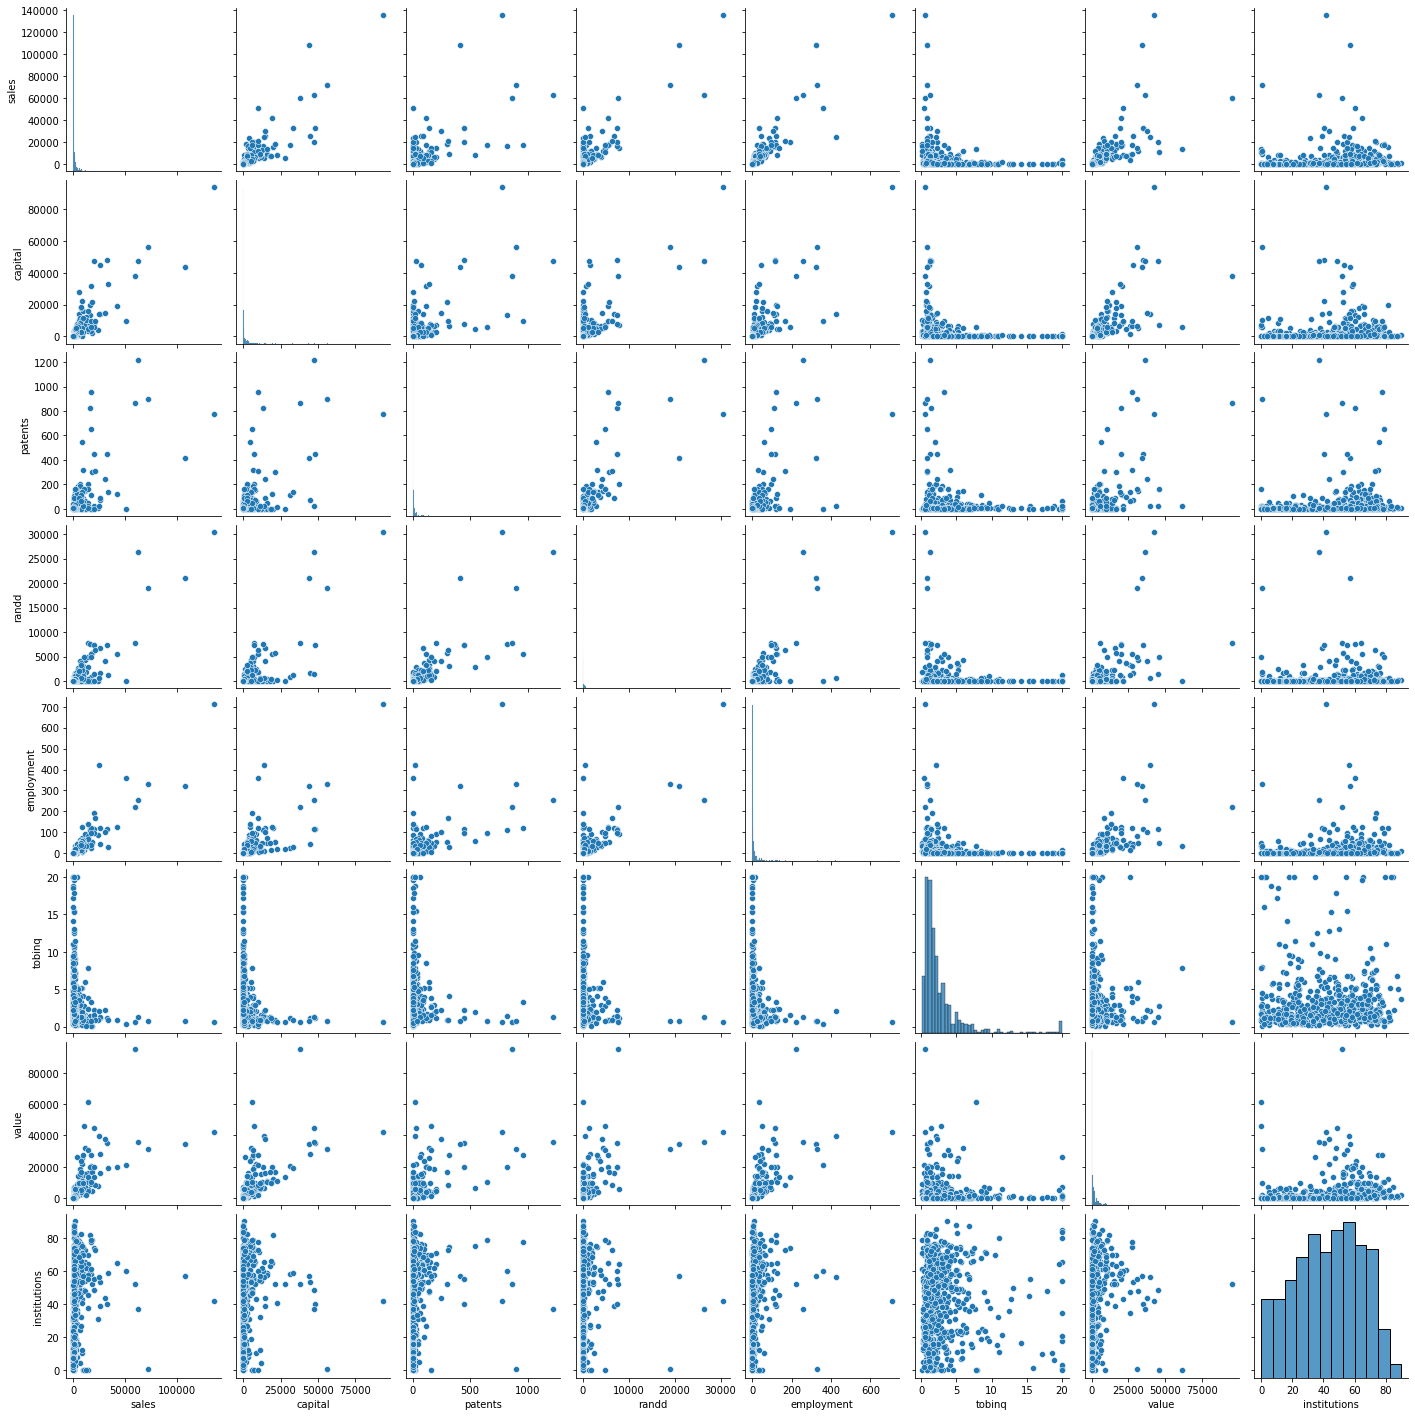

In [82]:
sns.pairplot(data=firm);

#### 1.2) Impute null values if present? Do you think scaling is necessary in this case?

In [84]:
# Scaling is necessary 
from sklearn.preprocessing import StandardScaler
X = StandardScaler()


In [85]:
numeric_scaled = X.fit_transform(numeric_data)

In [86]:
numeric_scaled

array([[-0.21370392, -0.28103047, -0.16288161, ...,  2.45357977,
        -0.15669634,  1.71883858],
       [-0.26180236, -0.28714317, -0.24518996, ..., -0.57982846,
        -0.35231705,  0.73827886],
       [ 0.65602747,  0.65662425,  1.15405199, ...,  0.7164464 ,
         3.27358451,  0.21592893],
       ...,
       [-0.28532458, -0.28686061, -0.13201598, ...,  0.72371878,
        -0.30458227, -0.0355558 ],
       [-0.21844297, -0.2845621 , -0.20403578, ..., -0.34762312,
        -0.34286083,  0.84764011],
       [-0.30597838, -0.30383283, -0.21432433, ..., -0.17294477,
        -0.38404134, -1.63905933]])

* Scaling is necessary in this case as Dataset has features with different "weights".
* As per the Data Dictionary we see that each column is not measured / observed with the same Weights as the other. So when Data is considered without scaling then more weightage will go to the data with more value even thought its of less importance in some case.
* Here we use Standard Scalare from Sk Learn Preprocessing. StandardScaler removes the mean and scales each feature/variable to unit variance.

In [93]:
numeric_data.isnull().any()


sales           False
capital         False
patents         False
randd           False
employment      False
tobinq           True
value           False
institutions    False
dtype: bool

In [88]:
from sklearn.impute import SimpleImputer

In [89]:
imputer = SimpleImputer(missing_values=np.NAN, strategy='median')

In [270]:
numeric_scaled = pd.DataFrame(imputer.fit_transform(numeric_data), columns=numeric_data.columns)

In [271]:
numeric_scaled

,sales,capital,patents,randd,employment,tobinq,value,institutions
0,826.995050,161.603986,10.0,382.078247,2.306000,11.049511,1625.453755,80.27
1,407.753973,122.101012,2.0,0.000000,1.860000,0.844187,243.117082,59.02
2,8407.845588,6221.144614,138.0,3296.700439,49.659005,5.205257,25865.233800,47.70
3,451.000010,266.899987,1.0,83.540161,3.071000,0.305221,63.024630,26.88
4,174.927981,140.124004,2.0,14.233637,1.947000,1.063300,67.406408,49.46
...,...,...,...,...,...,...,...,...
754,1253.900196,708.299935,32.0,412.936157,22.100002,0.697454,267.119487,33.50
755,171.821025,73.666008,1.0,0.037735,1.684000,1.680303,228.475701,46.41
756,202.726967,123.926991,13.0,74.861099,1.460000,5.229723,580.430741,42.25
757,785.687944,138.780992,6.0,0.621750,2.900000,1.625398,309.938651,61.39


In [94]:
numeric_scaled.isnull().any()

sales           False
capital         False
patents         False
randd           False
employment      False
tobinq          False
value           False
institutions    False
dtype: bool

#### 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE.

Enocoding sp500 column with yes as 1 and no as 0

In [101]:
categorical_data_new = pd.DataFrame()

In [106]:
categorical_data_new['sp500'] = np.where(categorical_data['sp500']=='yes',1,0)

In [110]:
categorical_data_new

,sp500
0,0
1,0
2,1
3,0
4,0
...,...
754,1
755,0
756,0
757,1


In [272]:
new_firm = pd.concat([numeric_scaled,categorical_data_new],axis =1, join='inner')

In [273]:
new_firm

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500
0,826.995050,161.603986,10.0,382.078247,2.306000,11.049511,1625.453755,80.27,0
1,407.753973,122.101012,2.0,0.000000,1.860000,0.844187,243.117082,59.02,0
2,8407.845588,6221.144614,138.0,3296.700439,49.659005,5.205257,25865.233800,47.70,1
3,451.000010,266.899987,1.0,83.540161,3.071000,0.305221,63.024630,26.88,0
4,174.927981,140.124004,2.0,14.233637,1.947000,1.063300,67.406408,49.46,0
...,...,...,...,...,...,...,...,...,...
754,1253.900196,708.299935,32.0,412.936157,22.100002,0.697454,267.119487,33.50,1
755,171.821025,73.666008,1.0,0.037735,1.684000,1.680303,228.475701,46.41,0
756,202.726967,123.926991,13.0,74.861099,1.460000,5.229723,580.430741,42.25,0
757,785.687944,138.780992,6.0,0.621750,2.900000,1.625398,309.938651,61.39,1


###### Spliting Data into 70:30

In [274]:

X= new_firm.drop(columns=['sales'])
Y=new_firm['sales']

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [276]:
# This adds the constant term beta0 to the Simple Linear Regression.
X_con=sm.add_constant(X)

In [277]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_con, Y, test_size=0.30 , random_state=1)

In [278]:
model = sm.OLS(y_trainc,X_trainc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     960.3
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          1.37e-306
Time:                        01:57:37   Log-Likelihood:                -4831.5
No. Observations:                 531   AIC:                             9681.
Df Residuals:                     522   BIC:                             9719.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           52.8005    233.075      0.227      0.821    -405.080     510.681
capital          0.4142      0.027     15.565      0.000       0.362       0.467
patents         -5.0452      2.407     -2.096      0.037      -9.774      -0.317
randd            1.0261      0.127      8.052      0.000       0.776       1.276
employment      83.9581      3.629     23.136      0.000      76.829      91.087
tobinq         -31.4063     30.227     -1.039      0.299     -90.787      27.975
value            0.1267      0.022      5.886      0.000       0.084       0.169
institutions     1.0555      4.964      0.213      0.832      -8.697      10.808
sp500         -100.4375    267.857     -0.375      0.708    -626.648     425.773
==============================================================================
Omnibus:                      231.591   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31508.283
Skew:                           0.809   Prob(JB):                         0.00
Kurtosis:                      40.703   Cond. No.                     2.90e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [279]:
print('The variation in the independent variable which is explained by the dependent variable is',round(model.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 93.6378 %


In [280]:
ypred = model.predict(X_testc)
print(ypred)

480     223.085408
622     409.461744
638    2253.736959
389     178.608423
748     555.507738
          ...     
285    1900.234613
632    2003.533026
358     598.306151
447     215.670570
603      55.448678
Length: 228, dtype: float64


In [281]:
print("The Root Mean Square Error (RMSE) of the model is for the training set is",mean_squared_error(model.fittedvalues,y_trainc,squared=False))

The Root Mean Square Error (RMSE) of the model is for the training set is 2164.4938172647676


In [282]:
model.predict(X_trainc)

626    2244.181361
333     118.200064
257     956.749409
173    1252.150199
242     407.437623
          ...     
645    1852.365851
715     499.188461
72      215.666160
235     146.091501
37      473.393708
Length: 531, dtype: float64

In [283]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,ypred)))

The Root Mean Square Error (RMSE) of the model is for testing set is 2953.569036057085


In [284]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [285]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9363784533904187


In [286]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, y_test))


The coefficient of determination R^2 of the prediction on Test set 0.892768228595857


In [287]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 2953.5690360571057


In [288]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [289]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

capital ---> 4.119837852562865
patents ---> 3.8852813007814486
randd ---> 6.229053691145338
employment ---> 3.888358497441767
tobinq ---> 1.5665491224775512
value ---> 3.241413503399095
institutions ---> 2.4474660981670664
sp500 ---> 2.220617734070768


* The RMSE value tells us that the average deviation between the predicted sales made by the model and the actual sales is 2953.56 (Test Data)
* We can Observe from the above predictions and calculations that RMSE for Training and testing data sets are moderately low. which indicates that  Model Predictions are Quiet Good when compared to Actual Observations.
* Coefficient of Determination R^2 on Test data is 0.8927 which tells us that the predictor variables explain about 89% of the variance in the response variable.
* F statistic has a very low p value (practically low) Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.
* We can also observe that VIF(Variance inflation factor) is low which indicates that multicollinearity cease to exist.
* Important Attributes to sales are Employment, Capital & Patents.

### Problem 2: Logistic Regression and Linear Discriminant Analysis

#### You are hired by the Government to do an analysis of car crashes. You are provided details of car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions.

#### 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [133]:
crash = pd.read_csv('Car_Crash.csv')

In [134]:
crash

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4.0,2:17:1
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
11213,11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
11214,11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2


In [135]:
crash = crash.drop(crash.columns[0],axis=1)

In [210]:
crash

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987.0,unavail,driver,0,4,2:13:2
1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994.0,nodeploy,driver,0,4,2:17:1
2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4,2:79:1
3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4,2:79:1
4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986.0,unavail,driver,0,4,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0,82:107:1
11213,10-24,71.228,survived,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2,82:108:2
11214,10-24,10.474,survived,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3,82:110:1
11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0,82:110:2


In [137]:
crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  float64
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [138]:
crash.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11140.000000
mean,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.825583
std,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [140]:
crash.isnull().sum()

dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64

##### From the above table we can see that injSeverity has missing values. 'injSeverity' columns contains 5 levels so we impute the NaNs with their respective Modal Values.

In [212]:
mode_1 = crash['injSeverity'].mode()[0]

In [213]:
crash['injSeverity'].fillna(value=mode_1,inplace=True)

In [214]:
crash.isnull().sum()

dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
caseid         0
dtype: int64

In [215]:
dvcat = list(crash.dvcat.unique())
injSeverity = list(crash.injSeverity.unique())

In [216]:
crash['yearacc'].unique()

array([1997, 1998, 1999, 2000, 2001, 2002], dtype=object)

In [217]:
crash['injSeverity'] = crash['injSeverity'].astype('object')
crash['deploy'] = crash['deploy'].astype('object')
crash['frontal'] = crash['frontal'].astype('object')
crash['yearacc'] = crash['yearacc'].astype('object')

##### Since there are 
* 6 levels in crash['injSeverity'], 
* crash['deploy'] has 2 categories -  0 if an airbag was unavailable or did not deploy; 1 if one or more bags deployed, 
* crash['frontal'] a numeric vector; 0 = non-frontal, 1=frontal impact
* crash['yearacc'], year of Accident - 1997, 1998, 1999, 2000, 2001, 2002

##### converting these column into Object.

In [218]:
dups = crash.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [219]:
crash.Survived.value_counts(normalize=True)

survived        0.894803
Not_Survived    0.105197
Name: Survived, dtype: float64

In [220]:
Numeric = crash.select_dtypes(include=[np.number])
Categorical = crash.select_dtypes(exclude=[np.number])

array([[<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ageOFocc'}>],
       [<AxesSubplot:title={'center':'yearVeh'}>, <AxesSubplot:>]],
      dtype=object)

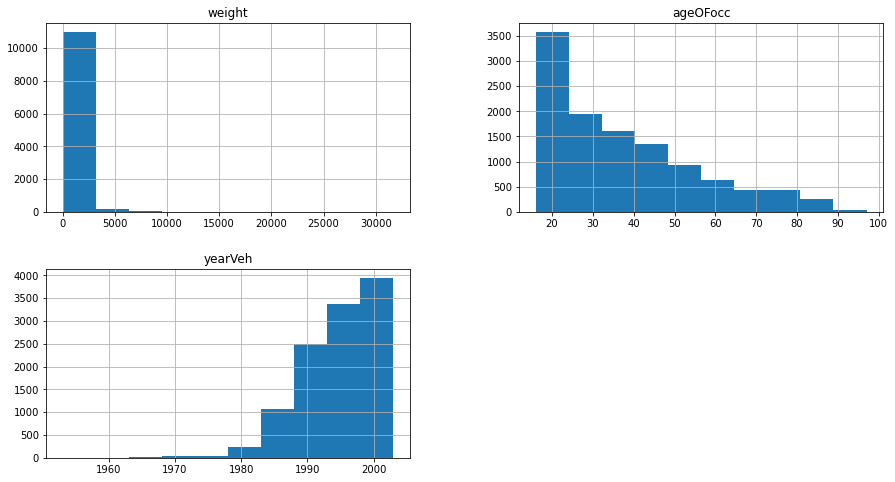

In [164]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
crash[['weight','ageOFocc','yearVeh']].hist()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


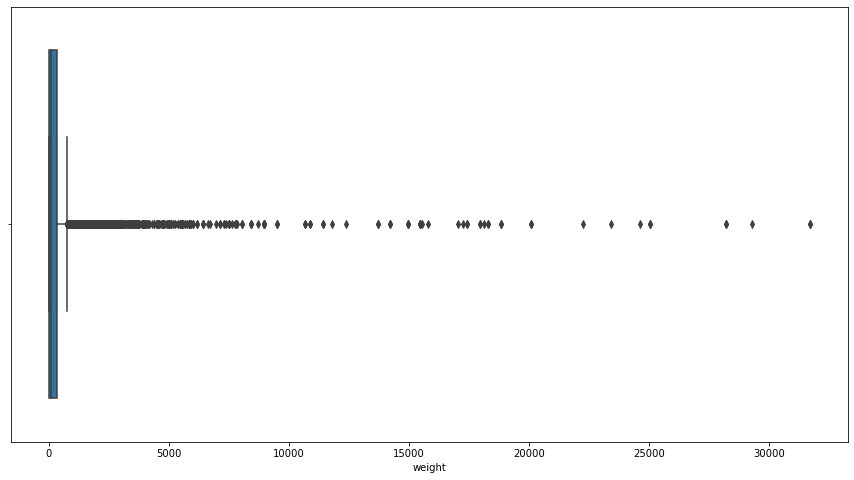

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


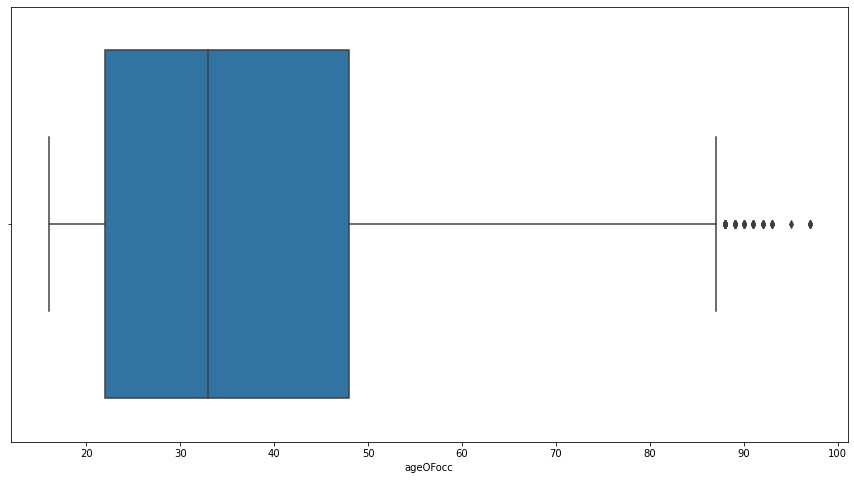

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


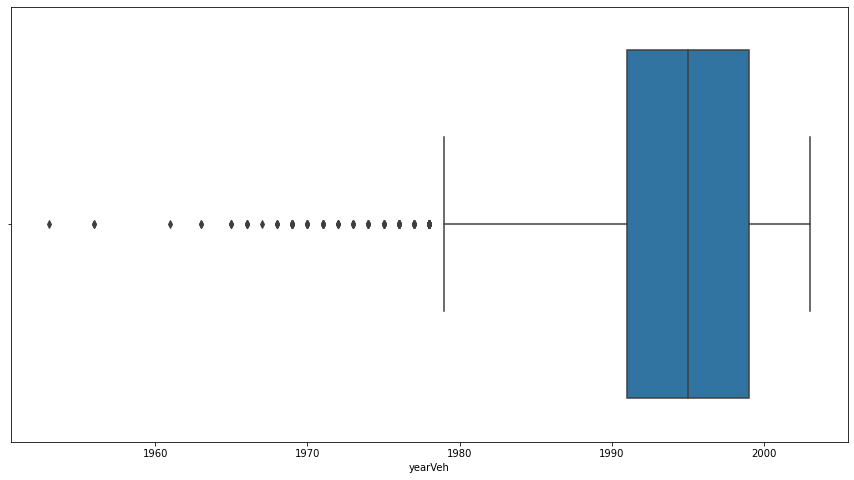

In [166]:
cols=['weight','ageOFocc','yearVeh'];

for i in cols:
    sns.boxplot(crash[i])
    plt.show()

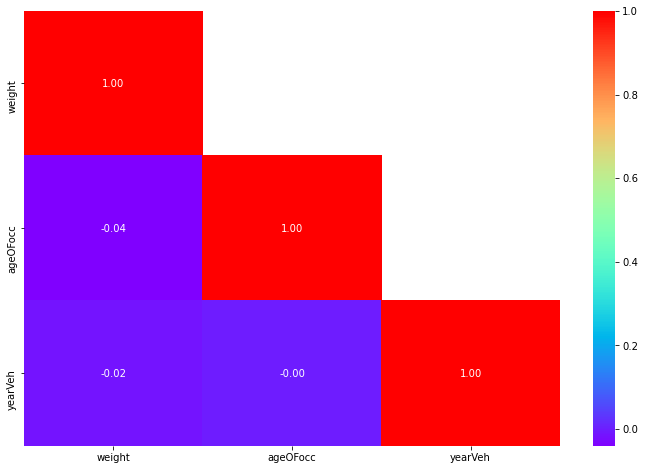

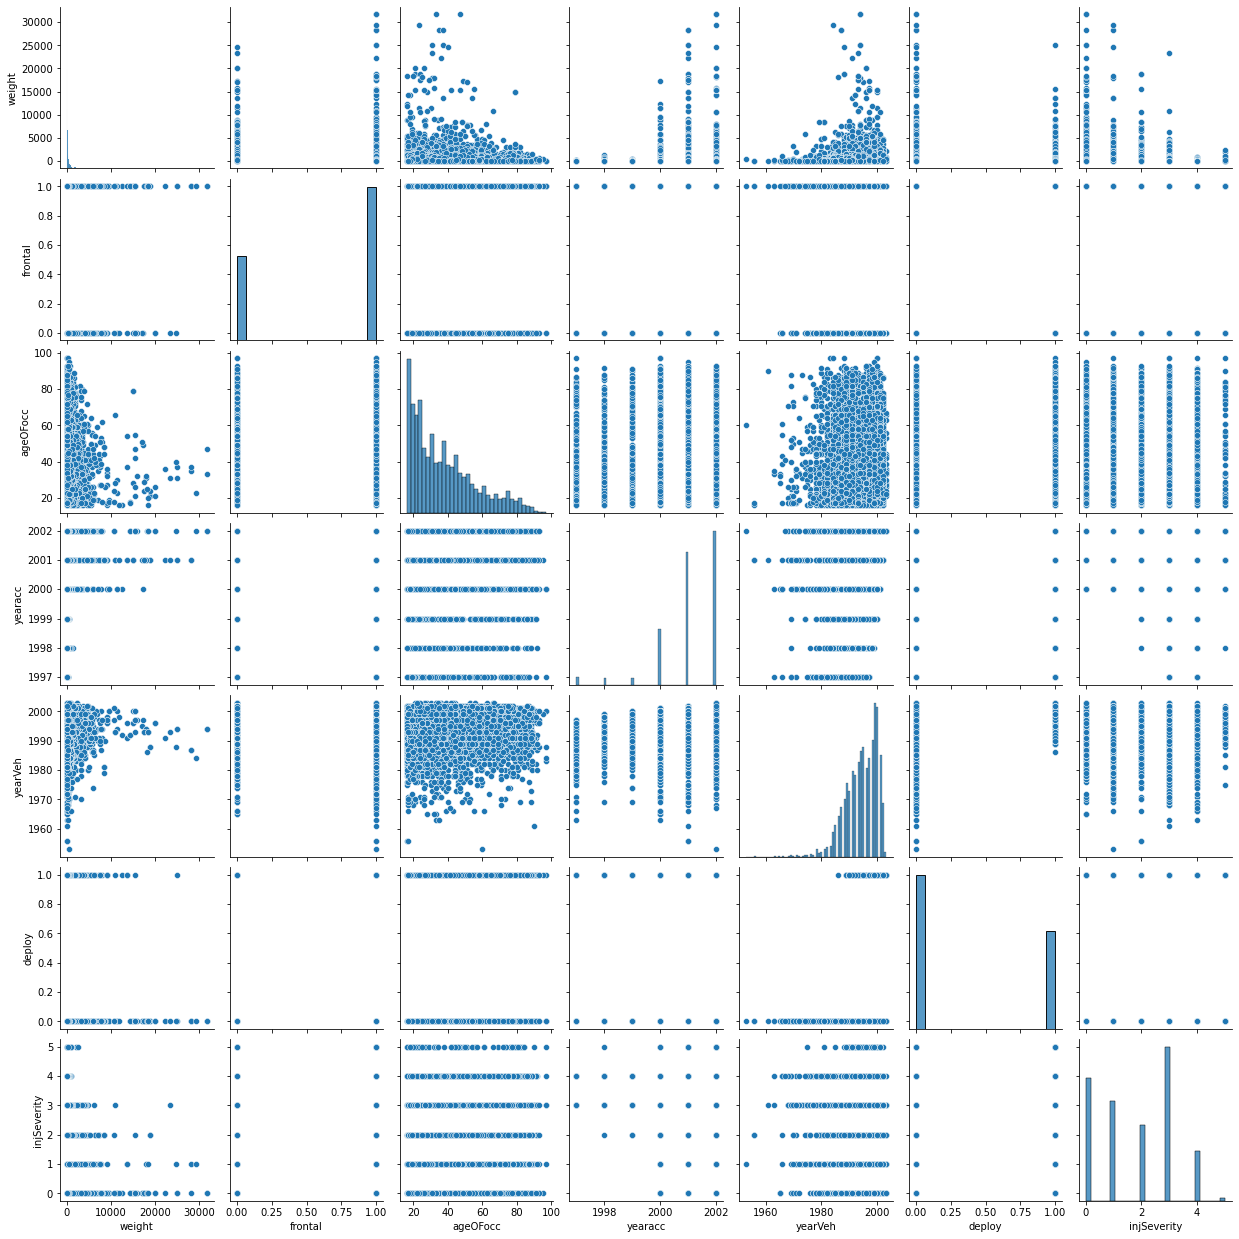

In [172]:
sns.pairplot(data=crash);

##### 2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [221]:
Categorical

,dvcat,Survived,airbag,seatbelt,frontal,sex,yearacc,abcat,occRole,deploy,injSeverity,caseid
0,55+,Not_Survived,none,none,1,m,1997,unavail,driver,0,4,2:13:2
1,25-39,Not_Survived,airbag,belted,0,f,1997,nodeploy,driver,0,4,2:17:1
2,55+,Not_Survived,none,belted,1,m,1997,unavail,driver,0,4,2:79:1
3,55+,Not_Survived,none,belted,1,f,1997,unavail,pass,0,4,2:79:1
4,55+,Not_Survived,none,none,1,m,1997,unavail,driver,0,4,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...
11212,25-39,survived,none,belted,1,m,2002,unavail,driver,0,0,82:107:1
11213,10-24,survived,airbag,belted,1,m,2002,nodeploy,driver,0,2,82:108:2
11214,10-24,survived,airbag,belted,1,f,2002,deploy,driver,1,3,82:110:1
11215,25-39,survived,airbag,belted,1,f,2002,deploy,driver,1,0,82:110:2


* From the above table which is a subset of dataframe crash, we have obtained colunns of object type.
* survived cane be one hot encoded, seatbelt can be onehot encoded, abcat can be one hot encoded, occRule can be one hot encoded, sex can be on hot encoded.
* caseid column will be drop as it is unique for each rows and doesn't help much in predictions


In [222]:
Categorical['dvcat'] = Categorical['dvcat'].astype('category')
Categorical['injSeverity'] = Categorical['injSeverity'].astype('category')
Categorical['yearacc'] = Categorical['yearacc'].astype('category')

<ipython-input-222-289e36b230d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['dvcat'] = Categorical['dvcat'].astype('category')
<ipython-input-222-289e36b230d4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['injSeverity'] = Categorical['injSeverity'].astype('category')
<ipython-input-222-289e36b230d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [223]:
Categorical['dvcat'] = Categorical['dvcat'].cat.codes
Categorical['injSeverity'] = Categorical['injSeverity'].cat.codes
Categorical['yearacc'] = Categorical['yearacc'].cat.codes

<ipython-input-223-247327a62e97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['dvcat'] = Categorical['dvcat'].cat.codes
<ipython-input-223-247327a62e97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Categorical['injSeverity'] = Categorical['injSeverity'].cat.codes
<ipython-input-223-247327a62e97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

In [224]:
Categorical

,dvcat,Survived,airbag,seatbelt,frontal,sex,yearacc,abcat,occRole,deploy,injSeverity,caseid
0,4,Not_Survived,none,none,1,m,0,unavail,driver,0,4,2:13:2
1,2,Not_Survived,airbag,belted,0,f,0,nodeploy,driver,0,4,2:17:1
2,4,Not_Survived,none,belted,1,m,0,unavail,driver,0,4,2:79:1
3,4,Not_Survived,none,belted,1,f,0,unavail,pass,0,4,2:79:1
4,4,Not_Survived,none,none,1,m,0,unavail,driver,0,4,4:58:1
...,...,...,...,...,...,...,...,...,...,...,...,...
11212,2,survived,none,belted,1,m,5,unavail,driver,0,0,82:107:1
11213,1,survived,airbag,belted,1,m,5,nodeploy,driver,0,2,82:108:2
11214,1,survived,airbag,belted,1,f,5,deploy,driver,1,3,82:110:1
11215,2,survived,airbag,belted,1,f,5,deploy,driver,1,0,82:110:2


In [225]:
Categorical = Categorical.drop(Categorical.columns[-1],axis=1)

In [226]:
Cat_Columns = list(Categorical.columns)

In [227]:
Cat_Columns.remove('dvcat')
Cat_Columns.remove('frontal')
Cat_Columns.remove('yearacc')
Cat_Columns.remove('deploy')
Cat_Columns.remove('injSeverity')
Cat_Columns.remove('Survived')

In [228]:
Cat_Columns

['airbag', 'seatbelt', 'sex', 'abcat', 'occRole']

In [229]:
new_Categorical = pd.get_dummies(Categorical,columns = Cat_Columns, drop_first = 'True')

In [230]:
new_Categorical

,dvcat,Survived,frontal,yearacc,deploy,injSeverity,airbag_none,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,4,Not_Survived,1,0,0,4,1,1,1,0,1,0
1,2,Not_Survived,0,0,0,4,0,0,0,1,0,0
2,4,Not_Survived,1,0,0,4,1,0,1,0,1,0
3,4,Not_Survived,1,0,0,4,1,0,0,0,1,1
4,4,Not_Survived,1,0,0,4,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11212,2,survived,1,5,0,0,1,0,1,0,1,0
11213,1,survived,1,5,0,2,0,0,1,1,0,0
11214,1,survived,1,5,1,3,0,0,0,0,0,0
11215,2,survived,1,5,1,0,0,0,0,0,0,0


In [231]:
new_Categorical['Survived'] = np.where(new_Categorical['Survived'] == 'survived',1,0)

In [232]:
Encoded_crash = pd.concat([Numeric,new_Categorical],axis=1,join='inner')

In [290]:
Encoded_crash

,weight,ageOFocc,yearVeh,dvcat,Survived,frontal,yearacc,deploy,injSeverity,airbag_none,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,27.078,32,1987.0,4,0,1,0,0,4,1,1,1,0,1,0
1,89.627,54,1994.0,2,0,0,0,0,4,0,0,0,1,0,0
2,27.078,67,1992.0,4,0,1,0,0,4,1,0,1,0,1,0
3,27.078,64,1992.0,4,0,1,0,0,4,1,0,0,0,1,1
4,13.374,23,1986.0,4,0,1,0,0,4,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,3179.688,17,1985.0,2,1,1,5,0,0,1,0,1,0,1,0
11213,71.228,54,2002.0,1,1,1,5,0,2,0,0,1,1,0,0
11214,10.474,27,1990.0,1,1,1,5,1,3,0,0,0,0,0,0
11215,10.474,18,1999.0,2,1,1,5,1,0,0,0,0,0,0,0


In [291]:
#### Train Test Split

In [292]:
XX = Encoded_crash.drop('Survived',axis = 1)
YY = Encoded_crash.Survived

In [293]:
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, test_size=0.30 , random_state=1,stratify=Encoded_crash.Survived)

In [294]:
#### Logistic Regression

In [295]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [296]:
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(XX_train, YY_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    4.0s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [297]:
ytrain_predict = model.predict(XX_train)
ytest_predict = model.predict(XX_test)

In [298]:
ytest_predict_prob=model.predict_proba(XX_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.020437,0.979563
1,0.001929,0.998071
2,0.002533,0.997467
3,0.001698,0.998302
4,0.013546,0.986454


In [299]:
model.score(XX_train, YY_train)

0.9802572920647051

In [300]:
### AUC and ROC for Training data for Logistic Regression

AUC: 0.991


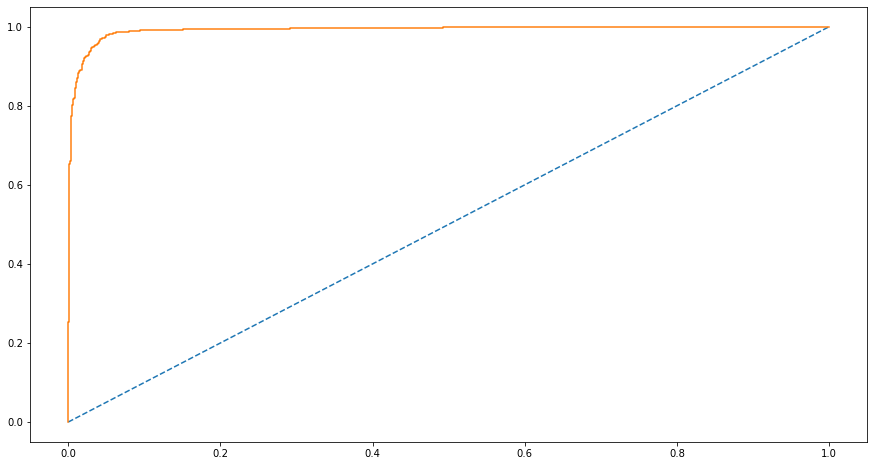

In [301]:
# predict probabilities
probs = model.predict_proba(XX_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(YY_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(YY_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [243]:
model.score(XX_test, YY_test)

0.9824717765894236

In [ ]:
# AUC and ROC for Test data for Logistic Regression

AUC: 0.991


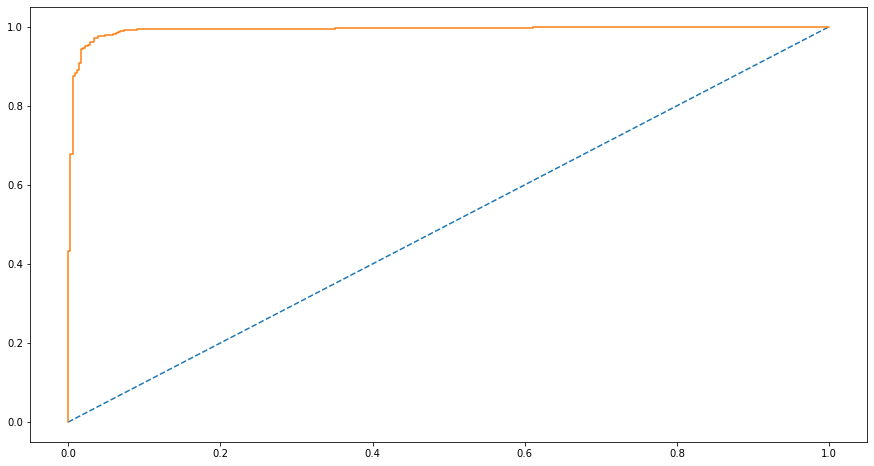

In [244]:
# predict probabilities
probs = model.predict_proba(XX_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(YY_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(YY_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [ ]:
##Confusion Matrix for training data for Logistic Regression

In [245]:
confusion_matrix(YY_train, ytrain_predict)

array([[ 728,   98],
       [  57, 6968]], dtype=int64)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


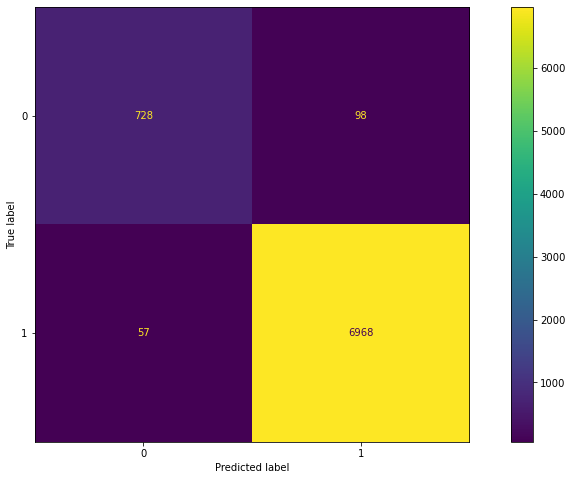

In [247]:
plot_confusion_matrix(model,XX_train,YY_train);

In [248]:
print(classification_report(YY_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



In [ ]:
##Confusion Matrix for testing data for Logistic Regression

In [249]:
confusion_matrix(YY_test, ytest_predict)

array([[ 316,   38],
       [  21, 2991]], dtype=int64)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


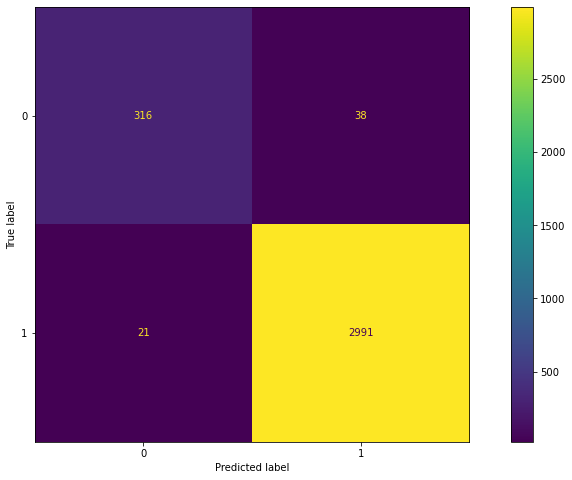

In [251]:
plot_confusion_matrix(model,XX_test,YY_test);

In [252]:
print(classification_report(YY_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



### LDA Model

In [302]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(XX_train,YY_train)

In [303]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(XX_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(XX_test)

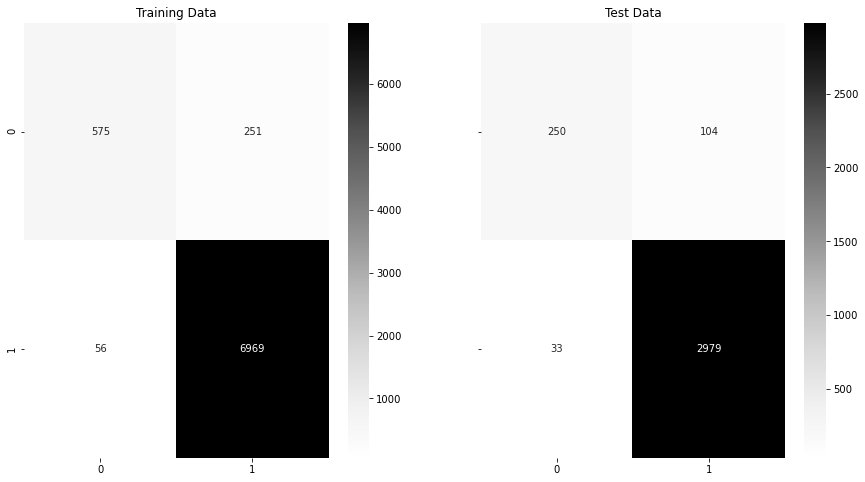

In [304]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(YY_train,pred_class_train)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(YY_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');

In [305]:
print('Classification Report of the training data:\n\n',metrics.classification_report(YY_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(YY_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.91      0.70      0.79       826
           1       0.97      0.99      0.98      7025

    accuracy                           0.96      7851
   macro avg       0.94      0.84      0.88      7851
weighted avg       0.96      0.96      0.96      7851
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.88      0.71      0.78       354
           1       0.97      0.99      0.98      3012

    accuracy                           0.96      3366
   macro avg       0.92      0.85      0.88      3366
weighted avg       0.96      0.96      0.96      3366
 



In [306]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(XX_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(XX_test)

In [307]:
model.score(XX_test, YY_test)

0.9592988710635769

AUC for the Training Data: 0.968


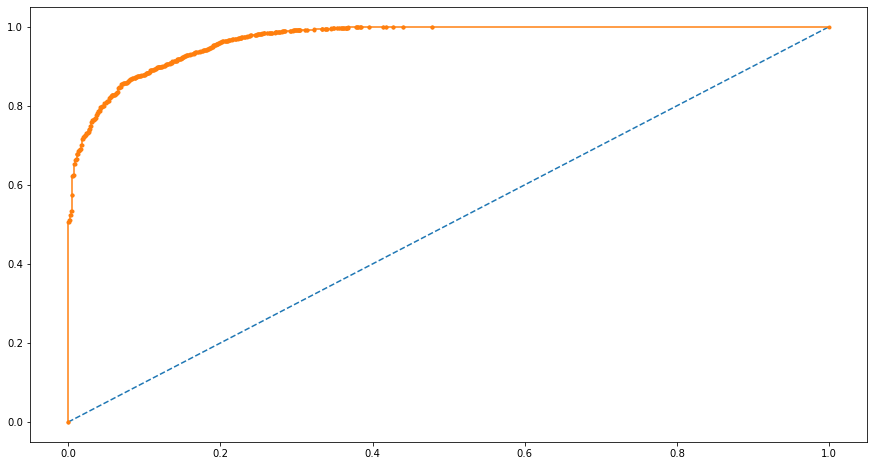

In [262]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(YY_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(YY_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.show()


AUC for the Test Data: 0.967


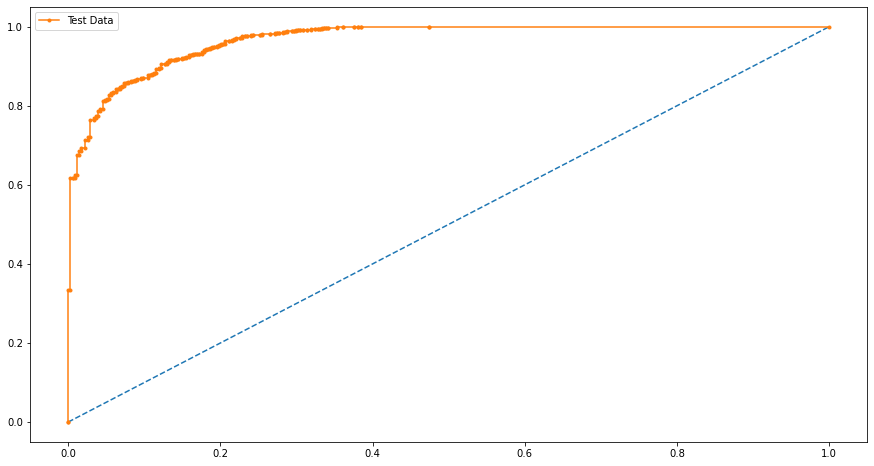

In [261]:

# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(YY_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(YY_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()